# https://www.youtube.com/watch?v=CtwJvgPJ9xw

Noah version of exploring, I'm going to make a faux pytorch model for some of the essential part of this project, i.e. the autoencoder for unsupervised pre-training, and the same for labelled data files.

In [34]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 5]
matplotlib.rcParams['figure.dpi'] = 200

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

from data_helper import UnlabeledDataset, LabeledDataset
from helper import collate_fn, draw_box

# 1. Load in data

In [49]:
## Neccessary imports


# All the images are saved in image_folder
# All the labels are saved in the annotation_csv file
image_folder = '../dat/data/'
annotation_csv = image_folder + 'annotation.csv'

# You shouldn't change the unlabeled_scene_index
# The first 106 scenes are unlabeled
unlabeled_scene_index = np.arange(106)
# The scenes from 106 - 133 are labeled
# You should devide the labeled_scene_index into two subsets (training and validation)
labeled_scene_index = np.arange(106, 134)

transform = torchvision.transforms.ToTensor()


In [57]:
# The labeled dataset can only be retrieved by sample.
# And all the returned data are tuple of tensors, since bounding boxes may have different size
# You can choose whether the loader returns the extra_info. It is optional. You don't have to use it.
labeled_trainset = LabeledDataset(image_folder=image_folder,
                                  annotation_file=annotation_csv,
                                  scene_index=labeled_scene_index,
                                  transform=transform,
                                  extra_info=True
                                 )



labeled_trainset = LabeledDataset(image_folder=image_folder,
annotation_file=annotation_csv,
scene_index=labeled_scene_index,
transform=transform,
extra_info=True
)


labeled_trainloader = torch.utils.data.DataLoader(labeled_trainset, batch_size=3, 
                                                  shuffle=True, num_workers=2, collate_fn=collate_fn)


unlabeled_trainset = UnlabeledDataset(image_folder=image_folder, scene_index=labeled_scene_index, 
                                      first_dim='sample', transform=transform)
unlabeled_trainloader = torch.utils.data.DataLoader(unlabeled_trainset, batch_size=3, 
                                                    shuffle=True, num_workers=2)

In [58]:
sample, target, road_image, extra = iter(labeled_trainloader).next()
#each of these is a tuple, for the batch size. 

3

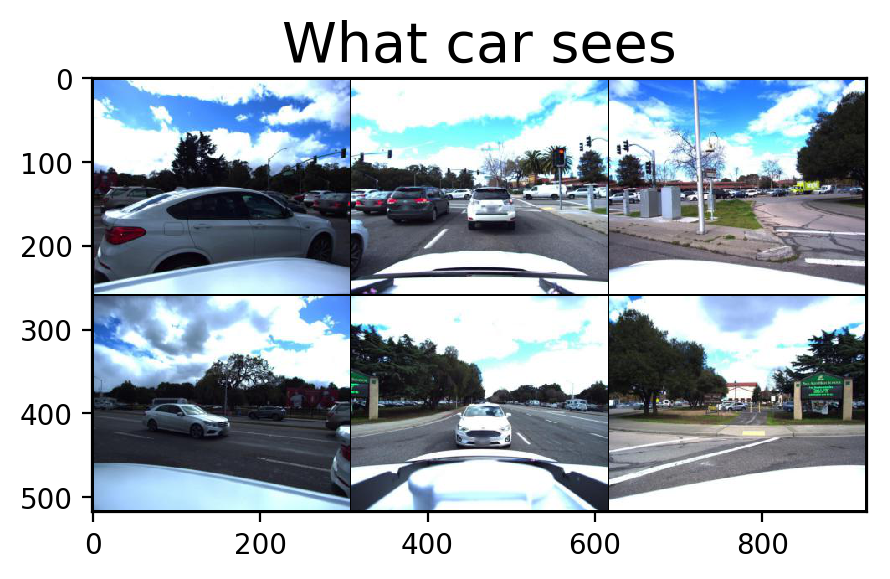

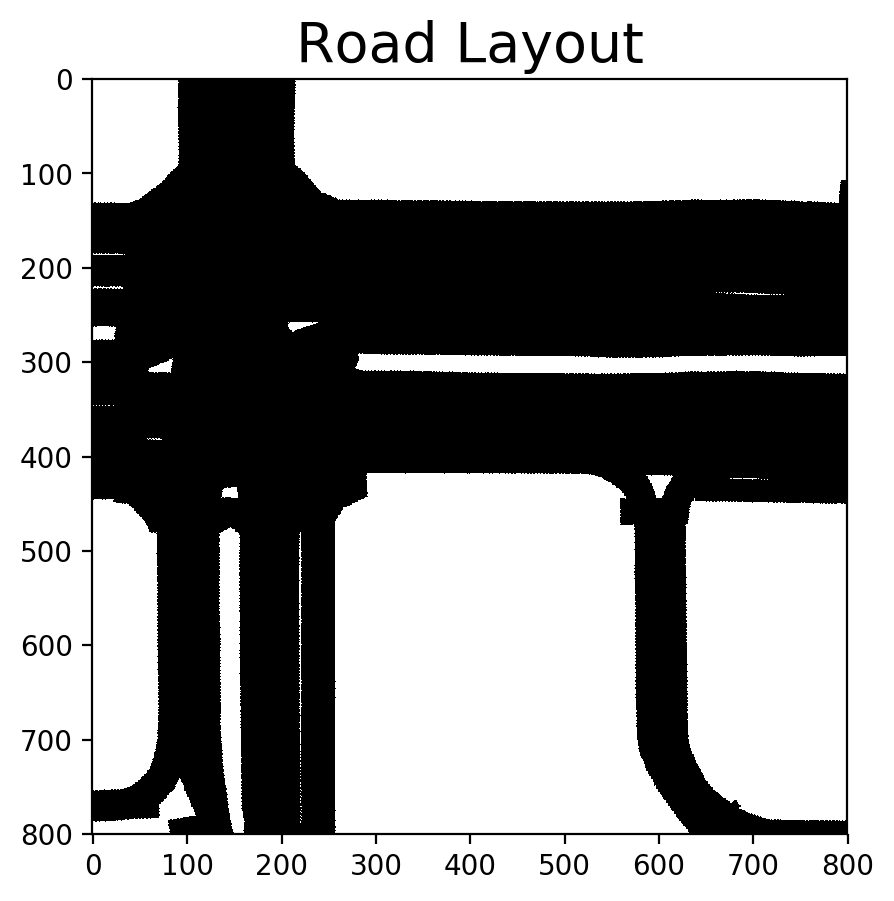

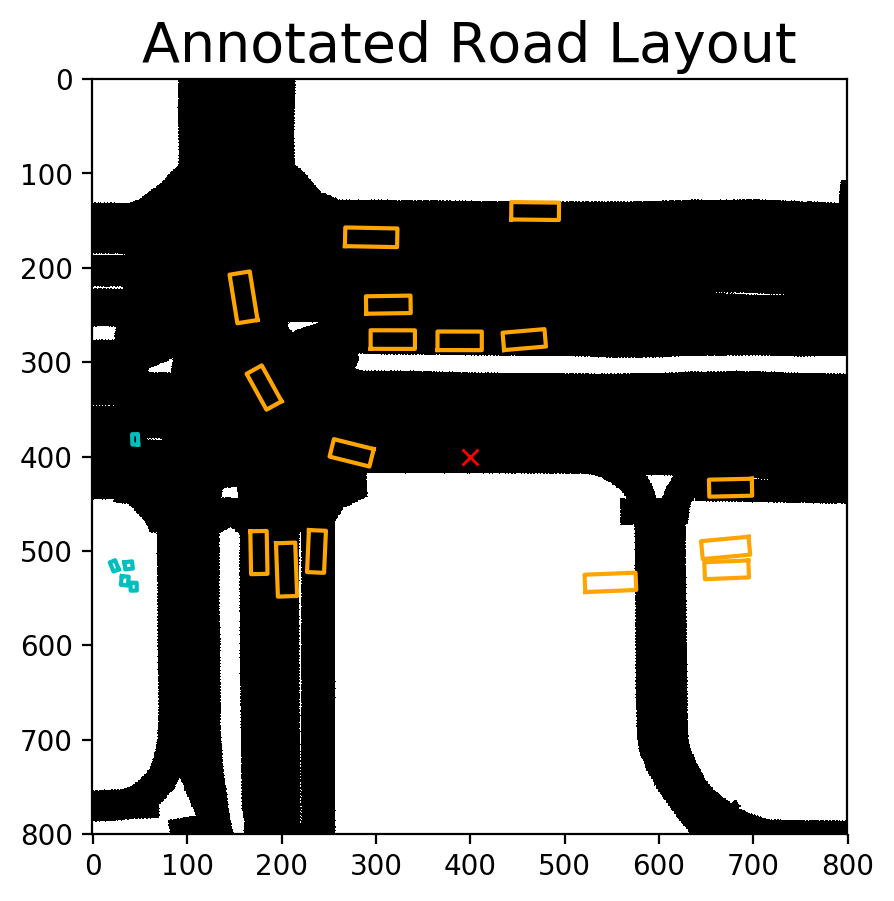

In [56]:
plt.figure()
plt.title("What car sees", fontsize = 20)
plt.imshow(torchvision.utils.make_grid(sample[1], nrow=3).numpy().transpose(1, 2, 0))

plt.figure()
plt.title("Road Layout", fontsize = 20)

plt.imshow(road_image[0],cmap = 'binary')

fig, ax = plt.subplots()
plt.title("Annotated Road Layout",fontsize = 20)

color_list = ['b', 'g', 'orange', 'c', 'm', 'y', 'k', 'w', 'r']

ax.imshow(road_image[0], cmap ='binary');

# The ego car position
ax.plot(400, 400, 'x', color="red")

for i, bb in enumerate(target[0]['bounding_box']):
    # You can check the implementation of the draw box to understand how it works 
    draw_box(ax, bb, color=color_list[target[0]['category'][i]])    


# 2. How it's iterated through (necessary for training)

### 2.1 Unlabeled iterator (pretend I'm training an autoencoder)

In [63]:
for image in unlabeled_trainloader: #no camera index, weird. It is implied by channels, though. 
    break 
    
    # print(torch.stack(sample).shape)
    image_pred = autoencoder(image)
    
    loss = F.mse(image_pred,image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

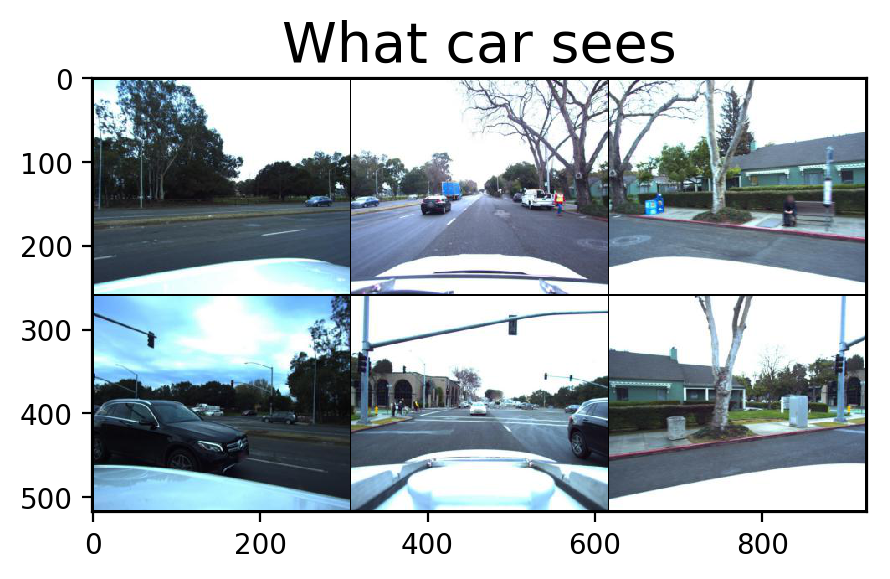

In [26]:
plt.figure()
plt.title("What car sees", fontsize = 20)
plt.imshow(torchvision.utils.make_grid(image[0], nrow=3).numpy().transpose(1, 2, 0))

## 2.2 Labeled iterator

In [73]:
for sample, target, road_image, extra in labeled_trainloader:
    
    sample = torch.stack(sample) #probably good practice to straight up rename, preserves memory. 
    road_image = torch.stack(road_image)
    break
    
    #And if this was a training thing . . .
    
    predicted_layout = model(sample)
    
    loss = F.bce_loss(predicted_layout,road_image)  ### Double check this! Make sure input =  prediction vs target, etc. 
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

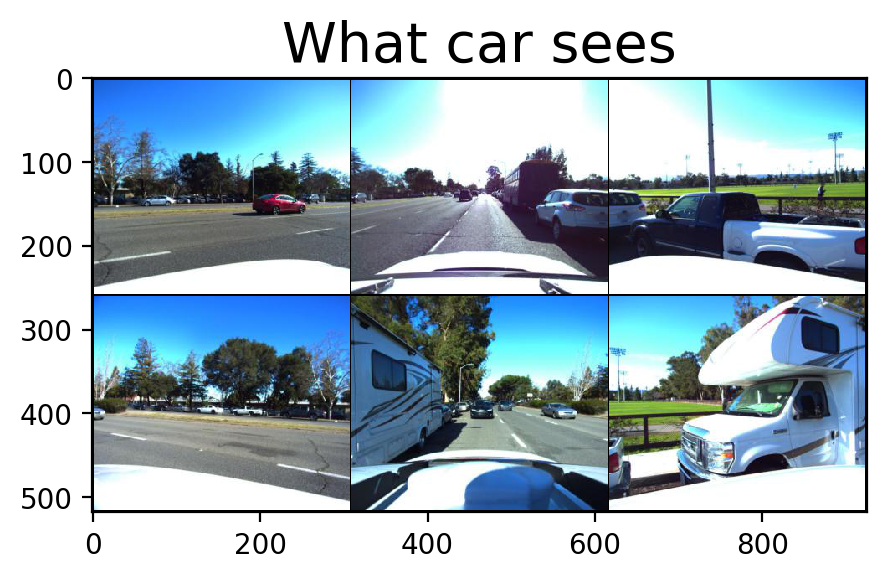

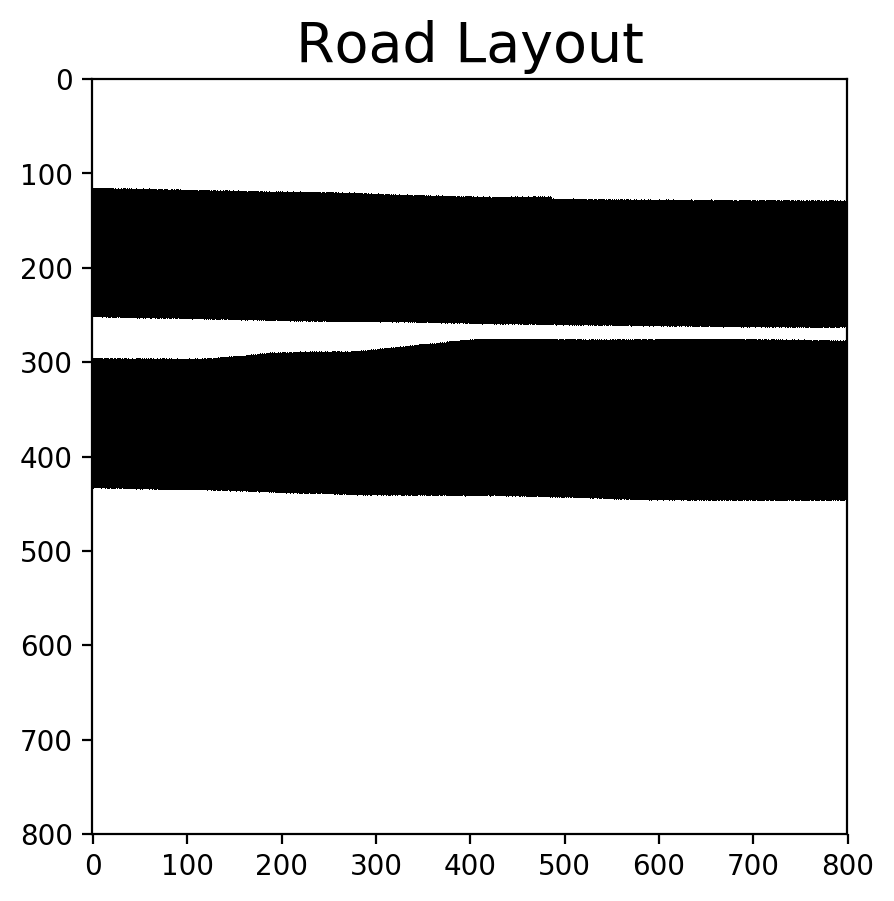

In [76]:
plt.figure()
plt.title("What car sees", fontsize = 20)
plt.imshow(torchvision.utils.make_grid(sample[0], nrow=3).numpy().transpose(1, 2, 0))
plt.figure()
plt.title("Road Layout", fontsize = 20)

plt.imshow(road_image[0],cmap = 'binary')


# And that's a wrap for now. 


## The biggest stuff to hit: What model works best at doing this task. In particular, find the best autoencoder, and start here. Use that to create the ideal $z$ which works in creating a road layout. 

## Data augmentations? What makes it even more obvious this is a road for instance. 


## Not even TOUCHING bounding box yet, but tbh task-wise, that might be easier! Differentiating between a car and a person is a well studied problem

# Note: Channel-wise version might suck. Why should they do that, they are independent representations, so have each trained differently?

In [83]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [84]:
device

device(type='cuda', index=0)

In [ ]:
class Conv_Autoencoder(nn.Module):
    """
    Convolutional autoencoder. Learns the best possible latent representation of the 6 channel input image of the car cameras.
    """
    
    
    def forward(x):
        
        return x
    
    
    
class Latent_Mapper(nn.Module):
    """
    Given z (which does not pass any more info back) take this latent and hopefully representative input to 
    more effectievely generate a road layout. 
    """
    #this should be in it somewhere, idk. 
    try:
        z = z.detach()
    except:
        pass 
    
    
    